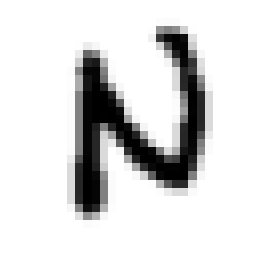

n

0.7096153846153846


In [1]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Necessary import for the programm to run smoothly
import numpy as np
import os
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm

#Load our data from the CSV file
data = pd.read_csv("letters-train-SVM.csv")

#arrays to store rotated images
letters_train = []
letters_test = []
#Load our data into images array and the labels to labels array
images = data.values[:,1:]
labels = data.values[:,0]

#Split the dataset to training and testing
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=1, stratify=labels) # change this split however you want

#Reshape the images and append them to img_train and img_test
img_train = []
for i in range(len(images_train)):
    img_train.append(images_train[i].reshape(28,28))
img_test = []
for i in range(len(images_test)):
    img_test.append(images_test[i].reshape(28,28))

h = 27
w = 27

#Rotate images so they will be straight and add them to letters_train ad letters_test respectivelly
for x in range(len(img_train)):
    img = img_train[x]
    empty_img = np.zeros([h,w], dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            empty_img[i,j] = img[j,i]
            empty_img = empty_img[0:h,0:w]
    letters_train.append(empty_img)
    
for x in range(len(img_test)):
    img = img_test[x]
    empty_img = np.zeros([h,w], dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            empty_img[i,j] = img[j,i]
            empty_img = empty_img[0:h,0:w]
    letters_test.append(empty_img)
    
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)    

#Print an image with its label 
some_letter = letters_test[2]
plt.imshow(some_letter, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
print(labels_test[2])
print("")

#Convert letters_train and labels_train arrays to numpy arrays
letters_train = np.array(letters_train)
labels_train = np.array(labels_train)
samples, x, y = letters_train.shape
#reshaping letters_train array from 3 dimensions to 2.
letters_train = letters_train.reshape((samples, x*y))

#Convert letters_test array to numpy array and reshape from 3d to 2d
letters_test = np.array(letters_test)
num,k,l = letters_test.shape
letters_test = letters_test.reshape((num,k*l))

#Initialize the model and fit the dataset into it
model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(letters_train, labels_train)
model.score(letters_train, labels_train)
#testing our classifier and printing out accuracy score
predicted= model.predict(letters_test)
print(accuracy_score(labels_test,predicted))